# MACHINE LEARNING: BÀI THỰC HÀNH SỐ 2

## PHƯƠNG PHÁP HỒI QUY TUYẾN TÍNH

### Ví dụ 1

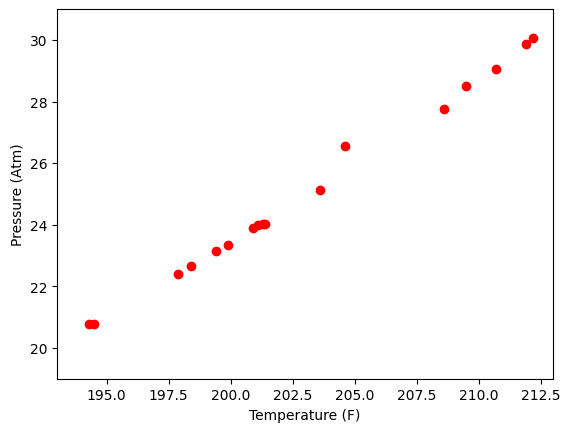

In [1]:
from __future__ import division, print_function, unicode_literals
import numpy as np
import matplotlib.pyplot as plt

# Temp (F degree)
X = np.array([[194.5, 194.3, 197.9, 198.4, 199.4, 199.9, 200.9, 201.1, 201.4, 201.3, 203.6, 204.6, 209.5, 208.6, 210.7, 211.9, 212.2]]).T

# Press (Atm)
y = np.array([[20.79,20.79,22.4,22.67,23.15,23.35,23.89,23.99,24.02,24.01,25.14,26.57,28.49,27.76,29.04,29.88,30.06]]).T

# Visualize data
plt.plot(X, y, 'ro')
plt.axis([193, 213, 19, 31])
plt.xlabel('Temperature (F)')
plt.ylabel('Pressure (Atm)')
plt.show()

w =  [[-81.06372713]
 [  0.5228924 ]]


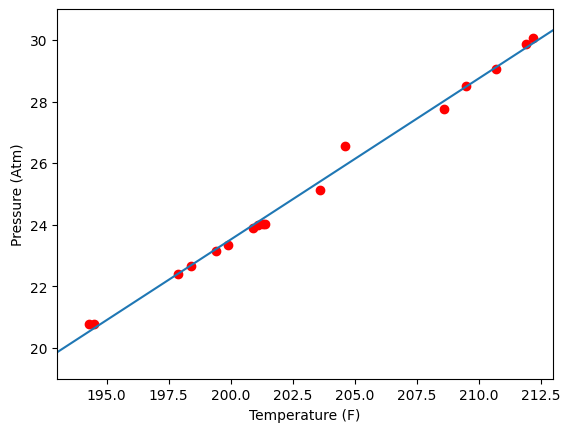

In [2]:
# Building Xbar
one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X), axis = 1)

# Calculating weights of the fitting line
A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w = np.dot(np.linalg.pinv(A), b)
print('w = ', w)

# Preparing the fitting line
w_0 = w[0][0]
w_1 = w[1][0]
x0 = np.linspace(193, 213, 2)
y0 = w_0 + w_1*x0

# Drawing the fitting line
plt.plot(X.T, y.T, 'ro') # data
plt.plot(x0, y0) # the fitting line
plt.axis([193, 213, 19, 31])
plt.xlabel('Temperature (F)')
plt.ylabel('Pressure (Atm)')
plt.show()

### Ví dụ 2

Đọc dữ liệu từ tệp

In [3]:
import math
import numpy as np

with open('fuel.csv') as f:
    lines = f.readlines()

x_data = []
y_data = []
lines.pop(0)

for line in lines:
    splitted = line.replace('\n', '').split(',')
    splitted.pop(0)
    splitted = list(map(float, splitted))
    fuel = 1000 * splitted[1] / splitted[5]
    dlic = 1000 * splitted[0] / splitted[5]
    logMiles = math.log2(splitted[3])
    y_data.append([fuel])
    x_data.append([splitted[-1], dlic, splitted[2], logMiles])

x_data = np.asarray(x_data)
y_data = np.asarray(y_data)

**a) Trường hợp sử dụng Numpy** – Dùng thuật toán HoldHouse để khai triển QR

In [4]:
def qr_householder(A):
    #""" Compute QR decomposition of A using Householder reflection"""
    M = A.shape[0]
    N = A.shape[1]
    
    # set Q to the identity matrix
    Q = np.identity(M)
    
    # set R to zero matrix
    R = np.copy(A)
    
    for n in range(N):
        # vector to transform
        x = A[n:, n]
        k = x.shape[0]
        
        # compute ro=-sign(x0)||x||
        ro = -np.sign(x[0]) * np.linalg.norm(x)

        # compute the householder vector v
        e = np.zeros(k)
        e[0] = 1
        v = (1 / (x[0] - ro)) * (x - (ro * e))
        
        # apply v to each column of A to find R
        for i in range(N):
            R[n:, i] = R[n:, i] - (2 / (v@v)) * ((np.outer(v, v)) @ R[n:, i])

        # apply v to each column of Q
        for i in range(M):
            Q[n:, i] = Q[n:, i] - (2 / (v@v)) * ((np.outer(v, v)) @ Q[n:, i])
        
    return Q.transpose(), R

def linear_regression(x_data, y_data):
    """
    This function calculate linear regression base on x_data and y_data
    :param x_data: vector
    :param y_data: vector
    :return: w (regression estimate)
    """
    
    # add column 1
    x_bars = np.concatenate((np.ones((x_data.shape[0], 1)), x_data), axis=1)

    Q, R = qr_householder(x_bars) # QR decomposition
    R_pinv = np.linalg.pinv(R) # calculate inverse matrix of R
    A = np.dot(R_pinv, Q.T) # apply formula

    return np.dot(A, y_data)

In [5]:
w = linear_regression(x_data, y_data) # get result
w = w.T.tolist()
line = ['Intercept', 'Tax', "Dlic", "Income", 'LogMiles']
res = list(zip(line, w[0]))
for o in res:
    print("{: >20}: {: >10}".format(*o))

           Intercept: 154.19284457730836
                 Tax: -4.2279832083296185
                Dlic: 0.47187121344198396
              Income: -0.006135330970417741
            LogMiles: 18.54527450604801


**b) Trường hợp sử dụng thư viện Scikit-Learn**

In [6]:
from sklearn import datasets, linear_model

# Load training data here and assign to Xbar (obs. Data) and y (label) fit the
# model by Linear Regression
regr = linear_model.LinearRegression(fit_intercept=False)

# fit_intercept = False for calculating the bias
regr.fit(Xbar, y)

LinearRegression(fit_intercept=False)

### Ví dụ 3

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Change to data path on your computer
data = pd.read_csv("SAT_GPA.csv")

# Show the description of data
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


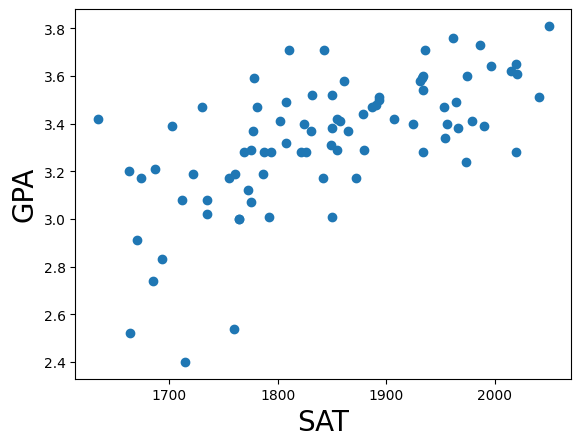

In [8]:
# Set to training data (x, y)
y = data['GPA']
x = data['SAT']

# Remind that we need to put component x_0 = 1 to x
plt.scatter(x,y)
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

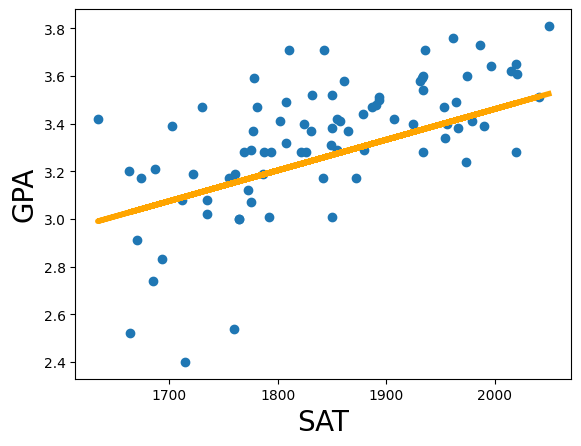

In [9]:
# Take the first 60 entries as training data and the rest as testing data
x_train = x[:60]
y_train = y[:60]
x_test = x[60:]
y_test = y[60:]

# Add x_0 = 1 to x
x_train = np.vstack((np.ones(len(x_train)), x_train)).T
x_test = np.vstack((np.ones(len(x_test)), x_test)).T

# Calculate the weight vector w
w = np.linalg.pinv(x_train.T.dot(x_train)).dot(x_train.T).dot(y_train)

# Draw the fitting line
plt.scatter(x,y)
yhat = w[0] + w[1]*x
plt.plot(x, yhat, lw=4, c='orange', label = 'regression line')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

In [10]:
# Validate the model by testing data
y_test_pred = x_test.dot(w)

# Calculate the sum squared error
SSE = np.sum((y_test - y_test_pred)**2)
print("SSE = ", SSE)

SSE =  1.6786863439759845


### Ví dụ 4

In [11]:
import numpy as np
import pandas as pd
from sklearn import linear_model

# Read data from file
data = pd.read_csv("vidu4_lin_reg.txt", sep=' ')

# Split data into x and y
x = data[['TUOI', 'BMI', 'HA', 'GLUCOSE', 'CHOLESTEROL']]
y = data['BEDAYNTM']

# Split data for training and testing
x_train = x[:80]
y_train = y[:80]
x_test = x[80:]
y_test = y[80:]

# Fit the model
regr = linear_model.LinearRegression(fit_intercept=False)
regr.fit(x_train, y_train)

# Predict the result
y_test_pred = regr.predict(x_test)

# Calculate the expected value and variance of error
E = np.mean(y_test - y_test_pred)
Var = np.var(y_test - y_test_pred)
print("E = ", E)
print("Var = ", Var)

E =  0.08131646292492087
Var =  0.22026156444119657


### Ví dụ 5

In [12]:
import numpy as np
import pandas as pd
from sklearn import linear_model

# Read data from file
data = pd.read_csv("real_estate.csv")

# Split data into x and y
x = data.iloc[:, 1:7]
y = data.iloc[:, 7]

# Split data for training and testing
x_train = x[:350]
y_train = y[:350]
x_test = x[350:]
y_test = y[350:]

# Fit the model
regr = linear_model.LinearRegression(fit_intercept=False)
regr.fit(x_train, y_train)

# Predict the result
y_test_pred = regr.predict(x_test)

# Calculate the sum squared error
SSE = np.sum((y_test - y_test_pred)**2)
print("SSE = ", SSE)

SSE =  4191.629611715825
